

---

#Predicting the Speed of Coronal Mass Ejections - David Barnett

---



From NASA:

"*The Space Weather Database Of Notifications, Knowledge, Information (DONKI) is a comprehensive on-line tool for space weather forecasters, scientists, and the general space science community. DONKI provides chronicles the daily interpretations of space weather observations, analysis, models, forecasts, and notifications provided by the Space Weather Research Center (SWRC), comprehensive knowledge-base search functionality to support anomaly resolution and space science research, intelligent linkages, relationships, cause-and-effects between space weather activities and comprehensive webservice API access to information stored in DONKI.*"

In summary, this API provides data on Coronal Mass Ejections, and I will use the existing data to try to predict the speed of future CMEs.

API: https://api.nasa.gov/

Definition from NOAA: "Coronal Mass Ejections (CMEs) are large expulsions of plasma and magnetic field from the Sun’s corona". These events occur from a range of several times a day to once or twice a week.

![](https://cosmos-images1.imgix.net/file/spina/photo/18036/190218-sun-full.jpg?ixlib=rails-2.1.4&auto=format&ch=Width%2CDPR&fit=max&w=1920)

Fun Fact: In 1859 a coronal mass ejection hit earth which caused massive blackouts and electrical disruptions. A pair of people, one in Maine and one in Massachusetts, were able to talk on a telegraph for 2 hours without any manmade power due to this.

In this project, I'm attempting to predict the CME's speed (in km/s) based off of other provided variables, such as the direction of the CME and the time since the last CME. In the machine learning portion of this project, the training set will consist of the data from 2015-2017 and the testing set will consist of the data from 2018-2019, which tests how well the models can predict future speeds. 

Unfortunately, the link to the README for this API doesn't work, so some variables are somewhat unclear.

---

I began by reading in the dataset through the NASA API which returned data in the JSON format. I requested data for Coronal Mass Ejections and CME Analysis; the first few rows from the resulting data are shown below.

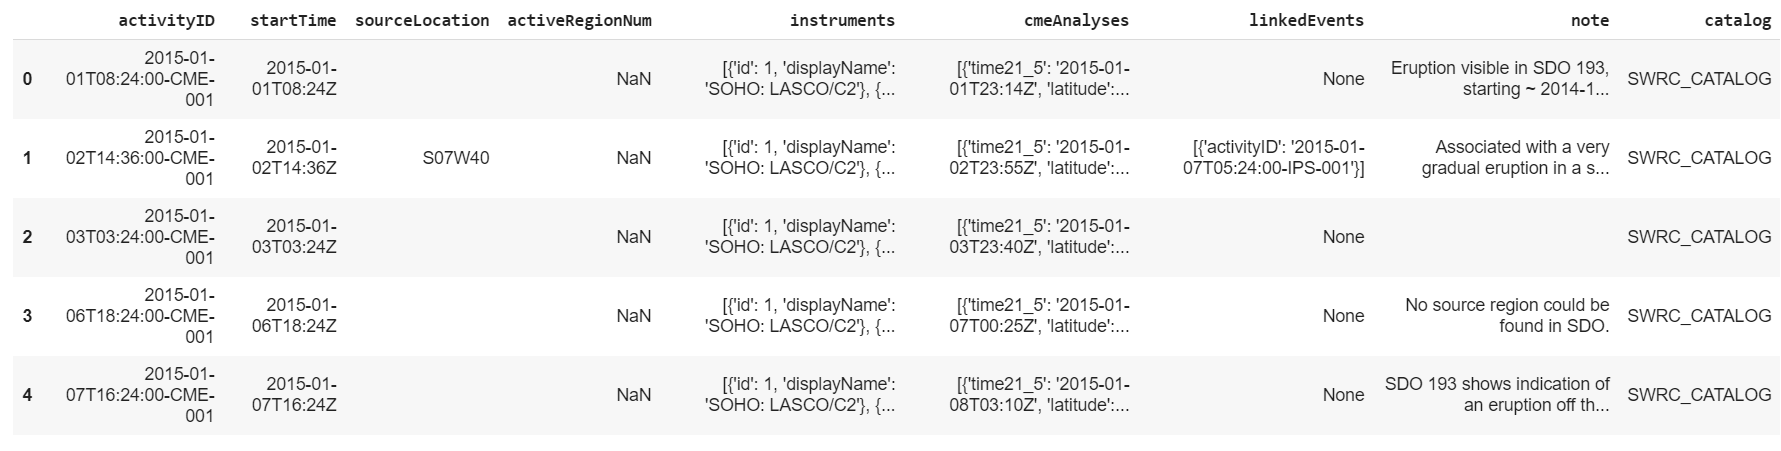

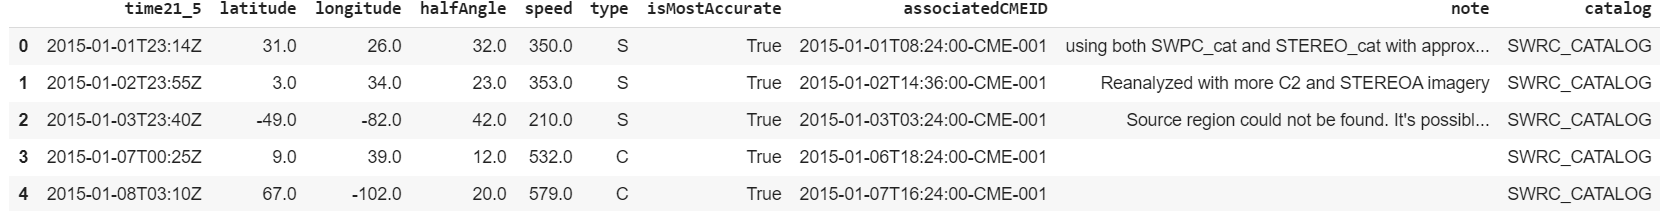

These are the same dataframes after cleaning. I set the indexes to the time that the CME occurred.

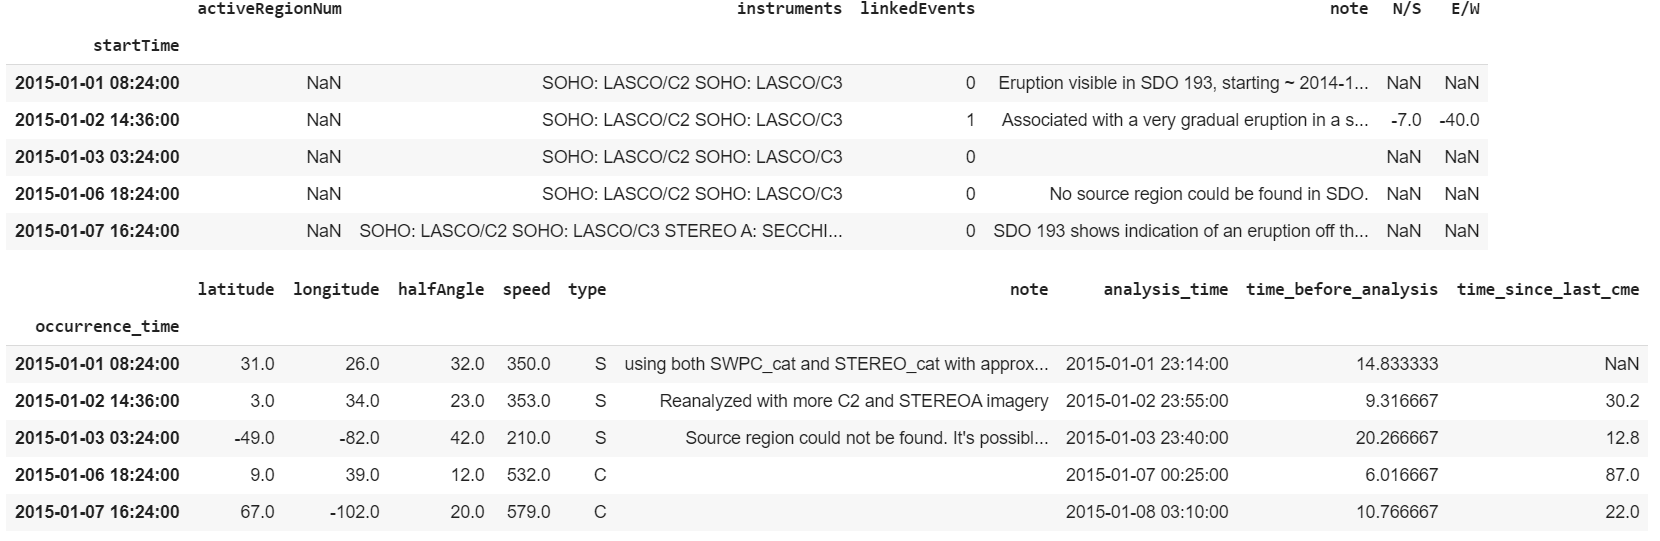

For my exploration, I first decided to perform some time series analyses.

First, I plotted average speed against time.

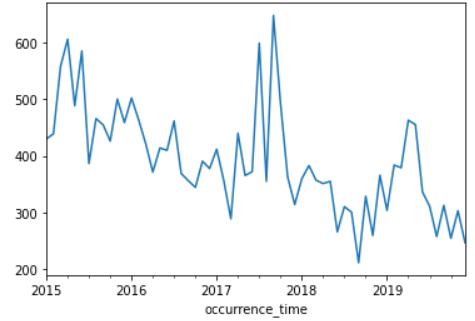

This plot shows that speed tended to decrease over time. This difference might affect how the machine learning portion of the project performs since the training and testing sets are based off of time, but this difference justifies using the time-based training and testing set since the model is supposed to predict future speeds.

Next I plotted the average half angle of the CME, which is essentially its direction.

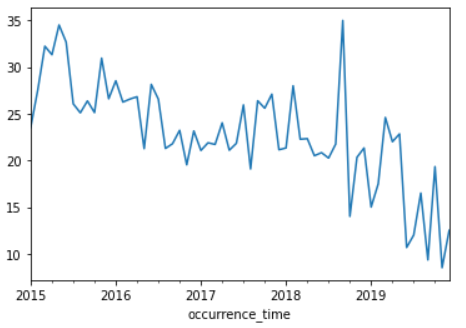

Similar to speed, the average half angle of the CME also decreases over time, meaning the average direction of CMEs changes over time.


The next two time series plots model how the time between the CME and its analysis changes over time and how the time since the last CME evolves over time.

Average time between CME and its analysis:

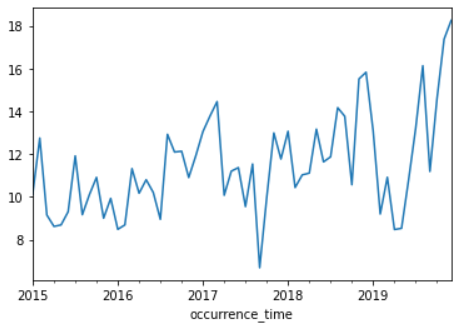

Average time since the last CME:

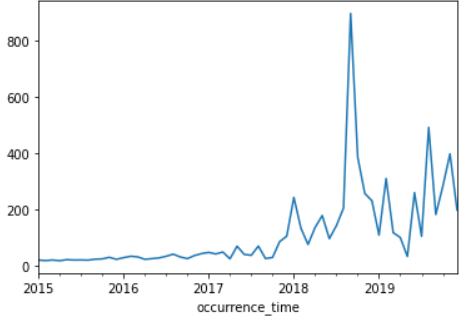

Both of these increase over time, implying that there are less CMEs in later years and there is a longer wait between the CME and its analysis in later years.

Next, I created some scatterplots of speed against the other 3 variables from above.

Speed vs. Half Angle (Direction)

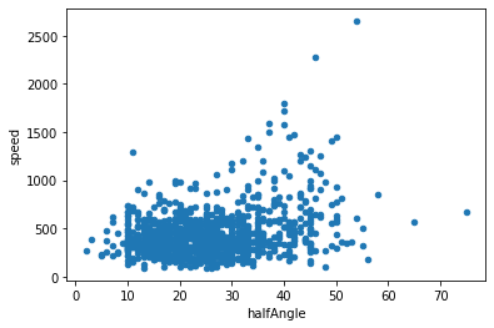

Speed vs. Time between CME and its analysis

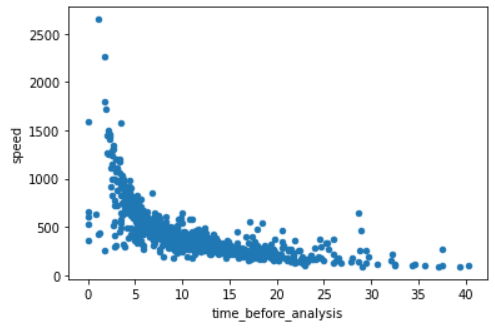

Speed vs. Time since the last CME

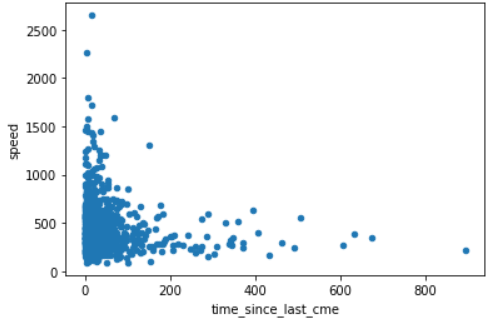

The plot of Speed vs Time between a CME and its analysis shows a strong exponential relationship between the two variables, implying faster CMEs are more urgent and cause NASA to perform its analysis faster. 

Additionally, speed and direction have a weak correlation as well.

I also made a box plot of speed against the type of CME

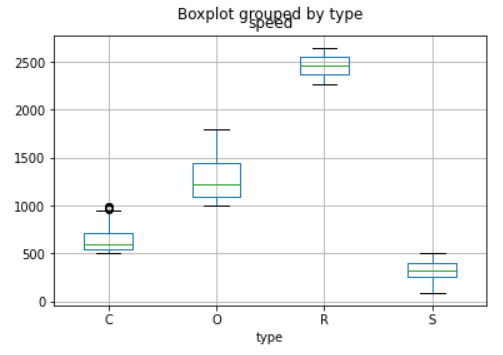

This plot shows a strong relationship between type and speed. Unfortunately, the link to the README of this dataset is broken and I could not find anything about types of CMEs that corresponds to these letters. I am keeping this variable, but it is possible that the only defining factor for a type of CME is its speed.

Now on to the machine learning portion of the project. Some variables that were mostly filled with NaN values had to be dropped since the machine learning models cannot handle data with NaN values. After combining the two data frames, and converting date variables to numeric variables so the models could handle them, this is the final data frame for the models. 

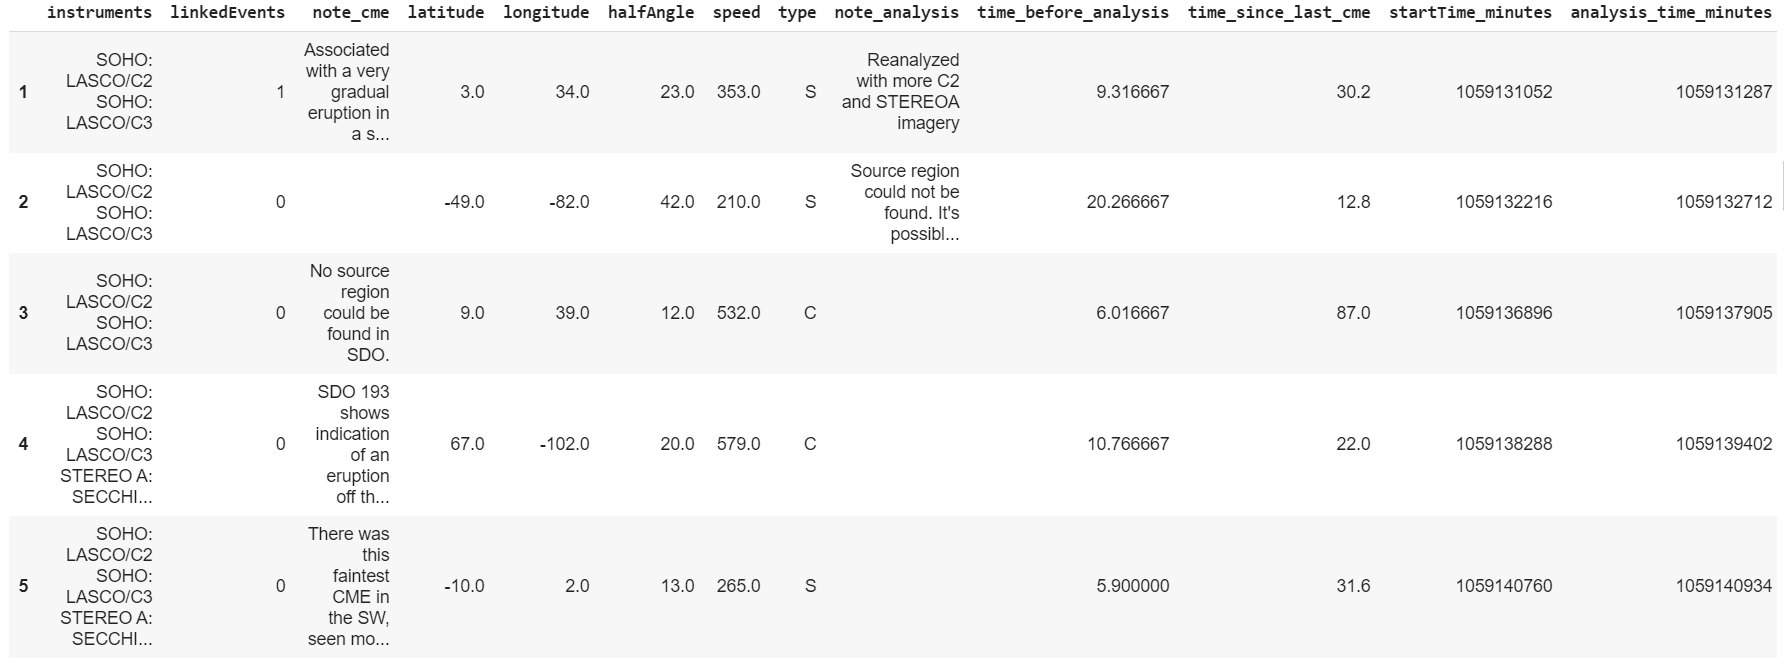

With this dataset, I prepared 11 models and trained them on the training data then measured the mean squared error of their predicted values for the test set against the actual values for the test set. The models, grouped below be their overall class, were:

Ensemble methods:

*   Random Forest
*   Neural Network
*   Gradient Boosting
*   AdaBoost
*   ExtraTrees (EXTremely RAndomized Trees)

Regression:

*   Linear Regression
*   Ridge Regression
*   Elastic Net
*   Lasso

Support Vectors:

*   Support Vector
*   Linear Support Vector


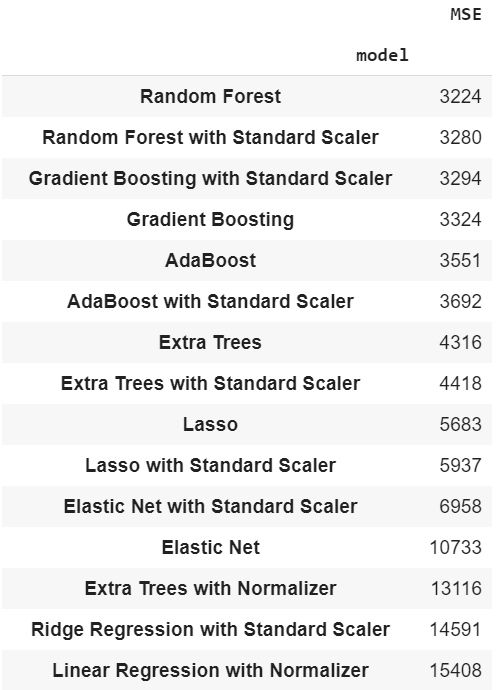

This analysis shows that the best models are Random Forest and Gradient Boosting, and they are similar with no scaler and with the standard scaler. Below are the scatterplots of the true testing values and the predicted values for the Random Forest and Gradient Boosting models. 

The Random Forest had an $R^2$ value of 83% and Gradient Boosting had an $R^2$ of 81%.

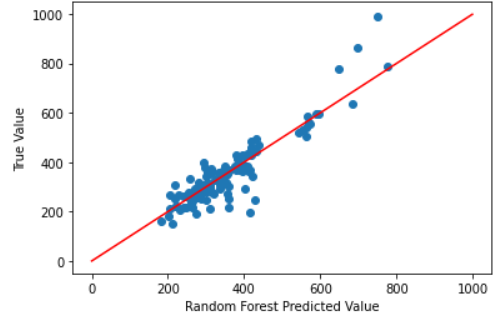

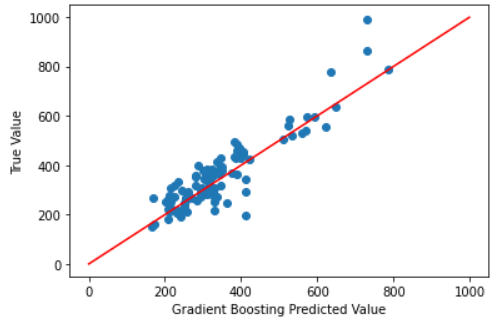

I also ran a voting regressor with these two models, but the MSE, $R^2$, and predicted value plot were nearly identical to the ones above since these two models perform so similarly.

Finally, I measured feature importance in the Random Forest model. The results are shown below.

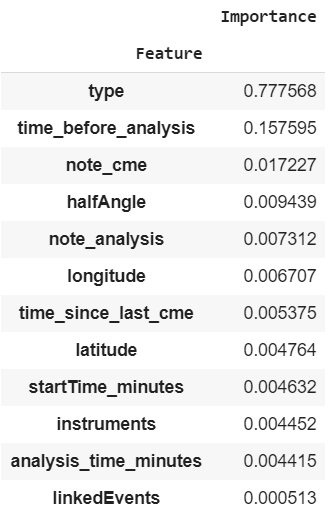

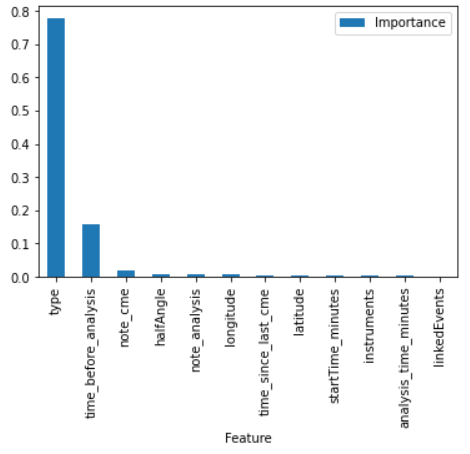

It appears that the type of CME was the most important feature in predicting the speed of the CME, with the time between the CME and when its analysis was recorded also having a non-negligible impact.